In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#add headers 
feature_names = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','50k']

train_df_nan = pd.read_csv('census-income.data.csv .csv', names = feature_names) 
test_df_nan = pd.read_csv('census-income.test.csv .csv', names = feature_names)


In [3]:
print('The total number of instances in train data is', len(train_df_nan), 'with features', len(train_df_nan.columns))
print('The total number of instances in test data is', len(test_df_nan), 'with features', len(test_df_nan.columns))

The total number of instances in train data is 32561 with features 15
The total number of instances in test data is 16281 with features 15


In [4]:
# replace '?' with nan values 
train_df_nan.replace(' ?', np.nan, inplace=True)
test_df_nan.replace(' ?', np.nan, inplace=True)

#replace the label column with '0' and '1', <=50k = 0; >50k = 1
train_df_nan['50k'] = pd.get_dummies(train_df_nan).iloc[:,-1]
test_df_nan['50k'] = pd.get_dummies(test_df_nan).iloc[:,-1]

counts_train = train_df_nan['50k'].value_counts()
counts_test = test_df_nan['50k'].value_counts()

print(counts_train)
print('***less than 50k',round(counts_train[0]/len(train_df_nan['50k']),3), '***More than 50k', round(counts_train[1]/len(train_df_nan['50k']),3))
print(counts_test)
print('***less than 50k',round(counts_test[0]/len(test_df_nan['50k']),3), '***More than 50k', round(counts_test[1]/len(test_df_nan['50k']),3))


#print(train_df_nan.head(50))
#print(test_df_nan.head(50))

0    24720
1     7841
Name: 50k, dtype: int64
***less than 50k 0.759 ***More than 50k 0.241
0    12435
1     3846
Name: 50k, dtype: int64
***less than 50k 0.764 ***More than 50k 0.236


In [5]:
#count instances with nan values
train_df = train_df_nan.dropna()
print(len(train_df_nan) - len(train_df), 'train instances contain missing values')
print(train_df_nan.isnull().sum())

test_df = test_df_nan.dropna()
print(len(test_df_nan) - len(test_df), 'test instances contain missing values')
print(test_df_nan.isnull().sum())

2399 train instances contain missing values
age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
50k                  0
dtype: int64
1221 test instances contain missing values
age                 0
workclass         963
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
50k                 0
dtype: int64


In [6]:
train_df_nan.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [7]:
train_df_nan['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [8]:
#use mode or KNN to fill missing values (pick two to three methods)

#fillna with mode 

#print(train_df_nan['workclass'].value_counts(dropna=False).head())
#print(train_df_nan['occupation'].value_counts(dropna=False).head())
#print(train_df_nan['native_country'].value_counts(dropna=False).head())

train_df_nan['workclass'].fillna(train_df_nan['workclass'].mode()[0],inplace=True)
train_df_nan['occupation'].fillna(value ='Other-service', inplace=True)      #replace NaN occupation with other services
train_df_nan['native_country'].fillna(train_df_nan['native_country'].mode()[0],inplace=True)

#print('*'*100, train_df_nan.isnull().sum())


#print(test_df_nan['workclass'].value_counts(dropna=False).head())
#print(test_df_nan['occupation'].value_counts(dropna=False).head(10))
#print(test_df_nan['native_country'].value_counts(dropna=False).head())


test_df_nan['workclass'].fillna(test_df_nan['workclass'].mode()[0],inplace=True)
test_df_nan['occupation'].fillna(value ='Other-service', inplace=True)      #replace NaN occupation with other services
test_df_nan['native_country'].fillna(test_df_nan['native_country'].mode()[0],inplace=True)


#print('*'*100, test_df_nan.isnull().sum())


In [9]:
#handle unbalanced data (oversampling)
#balancing the data

from sklearn.utils import resample

train_df_nan['50k'].value_counts()
rich=train_df_nan.loc[train_df_nan['50k']==1]
poor=train_df_nan.loc[train_df_nan['50k']==0]
train_df_nan['50k'].value_counts()
rich_upsample=resample(rich,replace=True,n_samples=len(poor),random_state=27)
balancetrain=pd.concat([rich_upsample,poor],ignore_index=True)
balancetrain['50k'].value_counts()


1    24720
0    24720
Name: 50k, dtype: int64

In [10]:
#transform categorical data into numeric data (encoder and one hot encoder)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
ohe = OneHotEncoder(sparse=False, categories='auto')


categoric_col_train = train_df_nan[['workclass','sex','marital_status','occupation','relationship','native_country','race']]

categoric_arr_train = ohe.fit_transform(categoric_col_train)
categoric_labels_train = ohe.categories_

categoric_col_train =[]
for i in categoric_labels_train:
    for label in list(i):
        categoric_col_train.append(label)
    
enc_df_train = pd.DataFrame(categoric_arr_train, columns=categoric_col_train)

enc_df_train

,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,Female,Male,...,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32557,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32558,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32559,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
from sklearn import preprocessing

continuous_df_train = train_df_nan[['age', 'fnlwgt', 'education_num', 'capital_gain','capital_loss','hours_per_week']]
continuous_norm_train = preprocessing.normalize(continuous_df_train, norm='l2', axis=1)
norm_df_train = pd.DataFrame(continuous_norm_train,columns=list(continuous_df_train))

norm_df_train

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.000503,0.999607,0.000168,0.028035,0.0,0.000516
1,0.000600,1.000000,0.000156,0.000000,0.0,0.000156
2,0.000176,1.000000,0.000042,0.000000,0.0,0.000185
3,0.000226,1.000000,0.000030,0.000000,0.0,0.000170
4,0.000083,1.000000,0.000038,0.000000,0.0,0.000118
...,...,...,...,...,...,...
32556,0.000105,1.000000,0.000047,0.000000,0.0,0.000148
32557,0.000259,1.000000,0.000058,0.000000,0.0,0.000259
32558,0.000382,1.000000,0.000059,0.000000,0.0,0.000263
32559,0.000109,1.000000,0.000045,0.000000,0.0,0.000099


In [12]:
X_df_train = pd.concat([enc_df_train, norm_df_train], axis=1)

X_df_train

,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,Female,Male,...,Asian-Pac-Islander,Black,Other,White,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.000503,0.999607,0.000168,0.028035,0.0,0.000516
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.000600,1.000000,0.000156,0.000000,0.0,0.000156
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.000176,1.000000,0.000042,0.000000,0.0,0.000185
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.000226,1.000000,0.000030,0.000000,0.0,0.000170
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.000083,1.000000,0.000038,0.000000,0.0,0.000118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.000105,1.000000,0.000047,0.000000,0.0,0.000148
32557,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.000259,1.000000,0.000058,0.000000,0.0,0.000259
32558,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.000382,1.000000,0.000059,0.000000,0.0,0.000263
32559,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.000109,1.000000,0.000045,0.000000,0.0,0.000099


In [13]:
#transform categorical data into numeric data (encoder and one hot encoder)
#test data

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
ohe = OneHotEncoder(sparse=False, categories='auto')


categoric_col_test = test_df_nan[['workclass','sex','marital_status','occupation','relationship','native_country','race']]

categoric_arr_test = ohe.fit_transform(categoric_col_test)
categoric_labels_test = ohe.categories_

categoric_col_test =[]
for i in categoric_labels_test:
    for label in list(i):
        categoric_col_test.append(label)
    
    
enc_df_test = pd.DataFrame(categoric_arr_test, columns=categoric_col_test)

# test_data is missing a column ' Holand-Netherlands' compared to train data 
# train = list(enc_df_train)
# test = list(enc_df_test)
# set(train)-set(test)

loc = enc_df_train.columns.get_loc(' Holand-Netherlands')
enc_df_test.insert(loc, ' Holand-Netherlands', 0)
enc_df_test.shape

(16281, 84)

In [14]:
from sklearn import preprocessing

continuous_df_test = test_df_nan[['age', 'fnlwgt', 'education_num', 'capital_gain','capital_loss','hours_per_week']]
continuous_norm_test = preprocessing.normalize(continuous_df_test, norm='l2', axis=1)
norm_df_test = pd.DataFrame(continuous_norm_test,columns=list(continuous_df_test))


In [15]:
X_df_test = pd.concat([enc_df_test, norm_df_test], axis=1)

X_df_test

,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,Female,Male,...,Asian-Pac-Islander,Black,Other,White,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.000110,1.000000,0.000031,0.000000,0.0,0.000176
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.000423,1.000000,0.000100,0.000000,0.0,0.000557
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.000083,1.000000,0.000036,0.000000,0.0,0.000119
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.000274,0.998852,0.000062,0.047898,0.0,0.000249
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.000174,1.000000,0.000097,0.000000,0.0,0.000290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.000181,1.000000,0.000060,0.000000,0.0,0.000167
16277,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.000199,1.000000,0.000028,0.000000,0.0,0.000124
16278,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.000101,1.000000,0.000035,0.000000,0.0,0.000133
16279,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.000523,0.997892,0.000155,0.064888,0.0,0.000476


In [16]:
Y_df_train = train_df_nan['50k'].astype(float)
Y_df_test = test_df_nan['50k'].astype(float)

In [16]:
#algorithms: SVM/ Random Forest/ KNN

In [28]:
#SVM polynomial kernel

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svclassifier = SVC(kernel='poly', degree = 2)
svclassifier.fit(X_df_train, Y_df_train)

y_pred = svclassifier.predict(X_df_test)

print(confusion_matrix(Y_df_test,y_pred))
print(classification_report(Y_df_test,y_pred,digits=4))

#accuracy goes down if increase power, relationship is linear


D:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[11815   620]
 [ 2428  1418]]
              precision    recall  f1-score   support

         0.0     0.8295    0.9501    0.8857     12435
         1.0     0.6958    0.3687    0.4820      3846

    accuracy                         0.8128     16281
   macro avg     0.7627    0.6594    0.6839     16281
weighted avg     0.7979    0.8128    0.7904     16281



In [31]:
# SVM rbf kernel 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svclassifier = SVC(kernel='rbf', gamma =0.1, C = 10)
svclassifier.fit(X_df_train, Y_df_train)

y_pred = svclassifier.predict(X_df_test)

print(confusion_matrix(Y_df_test,y_pred))
print(classification_report(Y_df_test,y_pred,digits=4))


[[11588   847]
 [ 1862  1984]]
              precision    recall  f1-score   support

         0.0     0.8616    0.9319    0.8953     12435
         1.0     0.7008    0.5159    0.5943      3846

    accuracy                         0.8336     16281
   macro avg     0.7812    0.7239    0.7448     16281
weighted avg     0.8236    0.8336    0.8242     16281



In [32]:
#SVM linear

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_df_train, Y_df_train)

y_pred = svclassifier.predict(X_df_test)

print(confusion_matrix(Y_df_test,y_pred))
print(classification_report(Y_df_test,y_pred,digits=4))


[[11151  1284]
 [ 1561  2285]]
              precision    recall  f1-score   support

         0.0     0.8772    0.8967    0.8869     12435
         1.0     0.6402    0.5941    0.6163      3846

    accuracy                         0.8253     16281
   macro avg     0.7587    0.7454    0.7516     16281
weighted avg     0.8212    0.8253    0.8230     16281



In [29]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

RFclassifier = RandomForestClassifier(n_estimators =50)
RFclassifier.fit(X_df_train, Y_df_train)

y_pred = RFclassifier.predict(X_df_test)

print(confusion_matrix(Y_df_test,y_pred))
print(classification_report(Y_df_test,y_pred,digits=4))

[[11449   986]
 [ 1723  2123]]
              precision    recall  f1-score   support

         0.0     0.8692    0.9207    0.8942     12435
         1.0     0.6829    0.5520    0.6105      3846

    accuracy                         0.8336     16281
   macro avg     0.7760    0.7364    0.7524     16281
weighted avg     0.8252    0.8336    0.8272     16281



In [27]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

KNNclassifier =KNeighborsClassifier(n_neighbors=5)
KNNclassifier.fit(X_df_train, Y_df_train)

y_pred = KNNclassifier.predict(X_df_test)

print(confusion_matrix(Y_df_test,y_pred))
print(classification_report(Y_df_test,y_pred,digits=4))

[[11227  1208]
 [ 1738  2108]]
              precision    recall  f1-score   support

         0.0     0.8659    0.9029    0.8840     12435
         1.0     0.6357    0.5481    0.5887      3846

    accuracy                         0.8191     16281
   macro avg     0.7508    0.7255    0.7363     16281
weighted avg     0.8116    0.8191    0.8142     16281



In [30]:
#naive bay
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

nb = GaussianNB()
nb.fit(X_df_train, Y_df_train)

y_pred = nb.predict(X_df_test)

print(confusion_matrix(Y_df_test,y_pred))
print(classification_report(Y_df_test,y_pred,digits=4))

[[5076 7359]
 [ 213 3633]]
              precision    recall  f1-score   support

         0.0     0.9597    0.4082    0.5728     12435
         1.0     0.3305    0.9446    0.4897      3846

    accuracy                         0.5349     16281
   macro avg     0.6451    0.6764    0.5312     16281
weighted avg     0.8111    0.5349    0.5532     16281



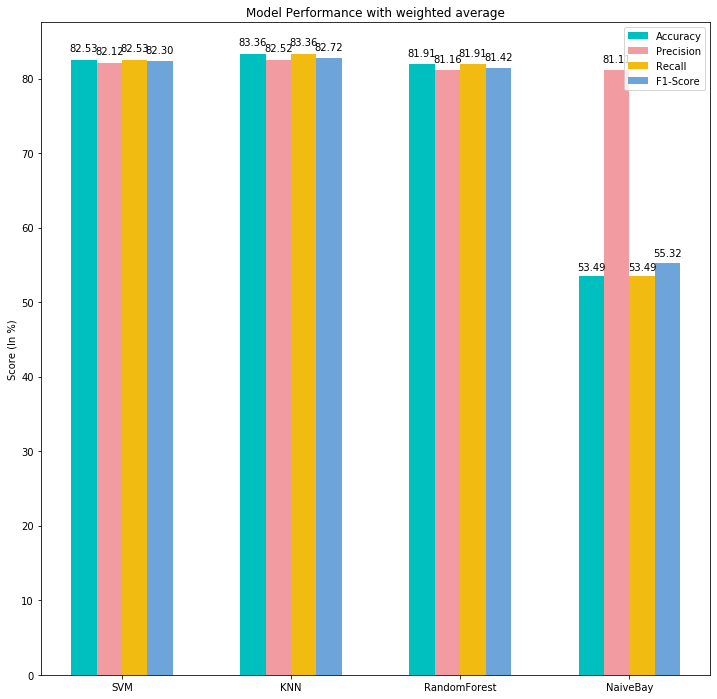

In [35]:
import numpy as np
import matplotlib.pyplot as plt
N=4
Accuracy_score = (82.53,83.36, 81.91, 53.49)
Precision_score = (82.12, 82.52, 81.16,81.11)
Recall_score = (82.53,83.36,81.91,53.49)
F1_score = (82.30, 82.72, 81.42,55.32)
ind = np.arange(N, dtype='float')  # the x locations for the groups
width = 0.15      # the width of the bars

fig, ax = plt.subplots(figsize=(12,12))
rects1 = ax.bar(ind, Accuracy_score, width, color='c')
rects2 = ax.bar(ind + width, Precision_score, width, color='#f29ca2')
rects3 = ax.bar(ind + 2*width, Recall_score, width, color='#f2bb12')
rects4 = ax.bar(ind + 3*width, F1_score, width, color='#6da4d9')


ax.set_ylabel('Score (In %)')
ax.set_title('Model Performance with weighted average')
ax.set_xticks(ind + width*1.5)
ax.set_xticklabels(('SVM', 'KNN', 'RandomForest','NaiveBay'))

ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), ('Accuracy', 'Precision', 'Recall', 'F1-Score'))


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%.2f' % float(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()

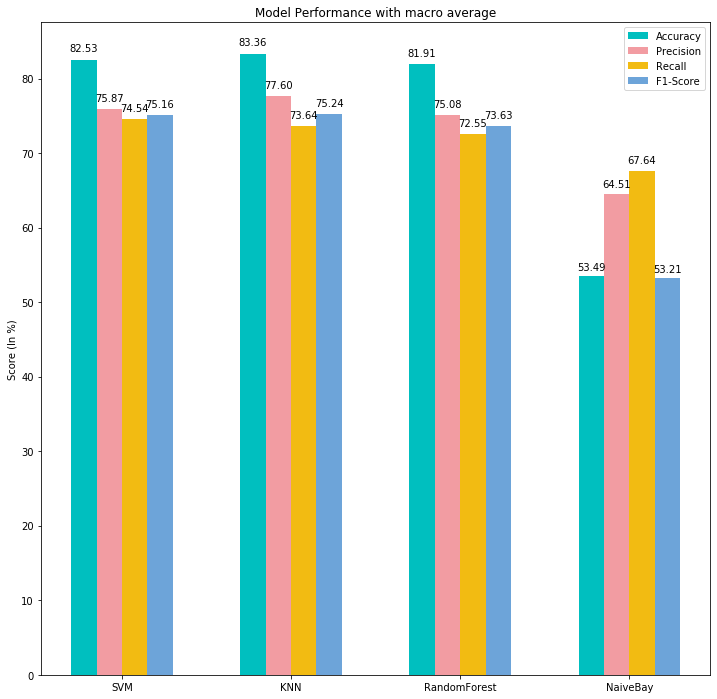

In [34]:
import numpy as np
import matplotlib.pyplot as plt
N=4
Accuracy_score = (82.53,83.36, 81.91, 53.49)
Precision_score = (75.87, 77.60, 75.08,64.51)
Recall_score = (74.54,73.64,72.55,67.64)
F1_score = (75.16, 75.24, 73.63,53.21)
ind = np.arange(N, dtype='float')  # the x locations for the groups
width = 0.15      # the width of the bars

fig, ax = plt.subplots(figsize=(12,12))
rects1 = ax.bar(ind, Accuracy_score, width, color='c')
rects2 = ax.bar(ind + width, Precision_score, width, color='#f29ca2')
rects3 = ax.bar(ind + 2*width, Recall_score, width, color='#f2bb12')
rects4 = ax.bar(ind + 3*width, F1_score, width, color='#6da4d9')


ax.set_ylabel('Score (In %)')
ax.set_title('Model Performance with macro average')
ax.set_xticks(ind + width*1.5)
ax.set_xticklabels(('SVM', 'KNN', 'RandomForest','NaiveBay'))

ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), ('Accuracy', 'Precision', 'Recall', 'F1-Score'))


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%.2f' % float(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()

In [24]:
svclassifier = SVC(kernel='poly', degree = 3)
svclassifier.fit(X_df_train, Y_df_train)

y_pred = svclassifier.predict(X_df_test)

print(confusion_matrix(Y_df_test,y_pred))
print(classification_report(Y_df_test,y_pred))


D:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[12435     0]
 [ 3846     0]]
              precision    recall  f1-score   support

         0.0       0.76      1.00      0.87     12435
         1.0       0.00      0.00      0.00      3846

    accuracy                           0.76     16281
   macro avg       0.38      0.50      0.43     16281
weighted avg       0.58      0.76      0.66     16281



D:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


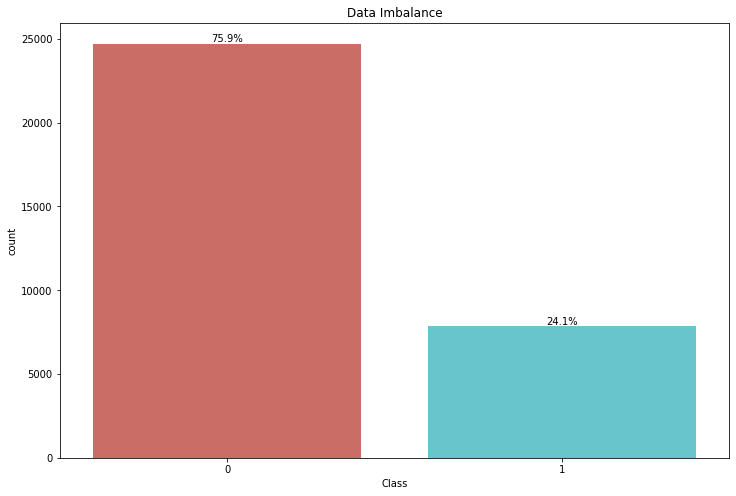

In [40]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pylab import rcParams

rcParams['figure.figsize'] = 12, 10
font = {'color':  'black',
        'size': "100",
        }
ncount = len(train_df_nan)
plt.figure(figsize=(12,8))
ax = sb.countplot(x='50k',data=train_df_nan, palette='hls')
plt.title('Data Imbalance')
plt.xlabel('Class')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text


plt.show()


In [36]:
train_df_nan['50k'].value_counts()

0    24720
1     7841
Name: 50k, dtype: int64

In [17]:
#Training Data Accuracy CV

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svclassifier = SVC(kernel='linear')

scores = cross_val_score(svclassifier, X_df_train, Y_df_train, cv=5)
print(np.mean(scores))



0.8225484015903177


In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svclassifier = SVC(kernel='rbf', gamma =0.1, C = 10)

scores = cross_val_score(svclassifier, X_df_train, Y_df_train, cv=5)
print(np.mean(scores))



0.8293663004740848


In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svclassifier = SVC(kernel='poly', degree = 2)

scores = cross_val_score(svclassifier, X_df_train, Y_df_train, cv=5)
print(np.mean(scores))

/Users/suzannezhen/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/suzannezhen/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/suzannezhen/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/suzannezhen/opt/an

0.8042136526417965


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

RFclassifier = RandomForestClassifier(n_estimators =50)

scores = cross_val_score(RFclassifier, X_df_train, Y_df_train, cv=5)
print(np.mean(scores))

0.8324990446247931


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

KNNclassifier =KNeighborsClassifier(n_neighbors=5)

scores = cross_val_score(KNNclassifier, X_df_train, Y_df_train, cv=5)
print(np.mean(scores))

0.8160374723997478


In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

nb = GaussianNB()

scores = cross_val_score(nb, X_df_train, Y_df_train, cv=5)
print(np.mean(scores))

0.5245854067710355
